In [12]:
import torch
from torch import nn
from torch.nn import functional as F
from torch import optim
from dlc_practical_prologue import *
from projet1_helpers import *
import weight_sharing
import weight_sharing_onehot as WSH

%load_ext autoreload
%autoreload 2

# for plotting
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import seaborn as sns
sns.set()


> 0 if first > second else 1

## Weight Sharing

Use simamiese newtwork and weight sharing for prediction. The Network predicts a single digit per image and we compare the image by subtracting the second by the first and taking the sigmoid of the result. The loss is then computed on this value. TODO: add the comparaison in the convnet, look at what is the most misclassified

In [21]:
torch.manual_seed(42)
all_classified = []
misclassified = []
accuracies_train = []
accuracies_test = []
mini_batch_size = 100
for i in range(15):
    print("-"*50,f" \n Iteration {i} \n ")
    # Generate the pairs
    train_input, train_target, train_classes, test_input, test_target, test_classes = generate_pair_sets(1000)
    
    # define the model
    model =  weight_sharing.LeNetLike() 
    
    # train model
    for k in range(20):
        weight_sharing.train(model, train_input, train_target.float(), mini_batch_size)

    train_accuracy = weight_sharing.accuracy(model,train_input,train_target)
    test_accuracy = weight_sharing.accuracy(model,test_input,test_target)
    
    misclass = weight_sharing.get_mis_class(model,test_input,test_target,test_classes)
    [all_classified.append(x) for x in test_classes]
    [misclassified.append(x) for x in misclass ]
    accuracies_train.append(train_accuracy )
    accuracies_test.append(test_accuracy )
    print(f"Baseline Training accuracy is {train_accuracy} ")
    print(f"Baseline Test accuracy is {test_accuracy} ")

--------------------------------------------------  
 Iteration 0 
 
Baseline Training accuracy is 0.998 
Baseline Test accuracy is 0.829 
--------------------------------------------------  
 Iteration 1 
 
Baseline Training accuracy is 0.998 
Baseline Test accuracy is 0.84 
--------------------------------------------------  
 Iteration 2 
 
Baseline Training accuracy is 0.993 
Baseline Test accuracy is 0.85 
--------------------------------------------------  
 Iteration 3 
 
Baseline Training accuracy is 0.997 
Baseline Test accuracy is 0.847 
--------------------------------------------------  
 Iteration 4 
 
Baseline Training accuracy is 1.0 
Baseline Test accuracy is 0.861 
--------------------------------------------------  
 Iteration 5 
 
Baseline Training accuracy is 0.995 
Baseline Test accuracy is 0.842 
--------------------------------------------------  
 Iteration 6 
 
Baseline Training accuracy is 0.998 
Baseline Test accuracy is 0.868 
-------------------------------

### Evaluation of model performance

In [22]:
accs_train = torch.Tensor(accuracies_train)
print(f"The training accuracy of the model is {accs_train.mean():.4f} ± {accs_train.var():.4f} ")

The training accuracy of the model is 0.9962 ± 0.0000 


In [23]:
accs_test = torch.Tensor(accuracies_test)
print(f"The test accuracy of the model is {accs_test.mean():.4f} ± {accs_test.var():.4f} ")

The test accuracy of the model is 0.8457 ± 0.0001 


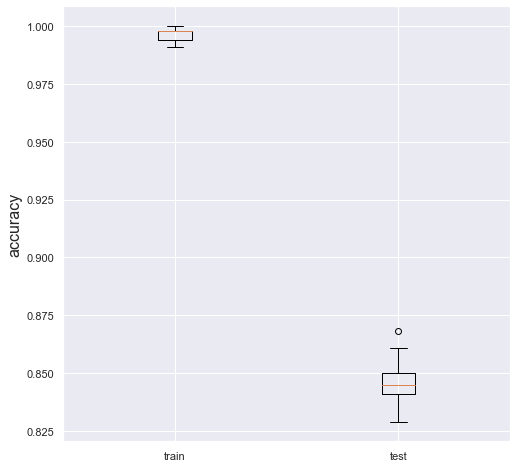

In [24]:
plot_performance(accuracies_train,accuracies_test)

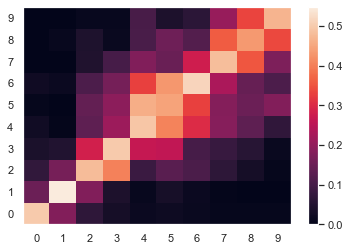

In [28]:
all_classified = np.stack(all_classified)
misclassified = np.stack(misclassified)
plot_heatmap(misclassified,all_classified)